In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ##ploting and visual
import scipy.stats as stat
import numpy as np
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

import datetime

%matplotlib inline
from scipy import stats
from sklearn.metrics.pairwise import linear_kernel # for cosine similarity
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hopehodges/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df= pd.read_csv("games.csv")


In [19]:
df.info


<bound method DataFrame.info of                                              name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                             Grand Theft Auto IV        Xbox 360   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date                                            summary  \
0       November 23, 1998  As a young boy, Link is tricked 

In [20]:
##Cleaning up data

In [21]:
df.drop_duplicates('name',keep='first', inplace=True)

df.reset_index(drop=True, inplace=True)


In [30]:
df.info

<bound method DataFrame.info of                                              name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                              Super Mario Galaxy             Wii   
...                                           ...             ...   
12249                            Charlie's Angels        GameCube   
12250                    Fast & Furious: Showdown        Xbox 360   
12251                     Drake of the 99 Dragons            Xbox   
12252  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
12253   Infestation: Survivor Stories (The War Z)              PC   

             release_date                                                  s  \
0       November 23, 1998  young boy link tricked ganondorf

In [14]:
#Getting rid of punctuation and making everything lowercase

In [83]:
df.rename(columns={'summary': 's'}, inplace=True)
df['s']=df['s'].str.lower()
df['s'] = df['s'].str.replace(r'[^\w\s]+', '')
print(df['s'])


0        young boy link tricked ganondorf king gerudo t...
1        major publishers development efforts shift num...
2        metacritics 2008 ps3 game year also known gta ...
3        tale souls swords transcending world history t...
4        metacritics 2007 wii game year ultimate ninten...
                               ...                        
12249    join natalie dylan alex intense adventure base...
12250    fast furious showdown takes franchises iconic ...
12251    drake revenge supernatural hong kong world you...
12252    head journey redemption driven bittersweet rev...
12253    formerly known war z 5 years since outbreak gi...
Name: s, Length: 12060, dtype: object


/var/folders/l8/z5jtbjgx7xg8pwl0g1mdd2fh0000gn/T/ipykernel_56579/1066207659.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['s'] = df['s'].str.replace(r'[^\w\s]+', '')


In [26]:
null_rows = df[df['s'].isnull()].index

df.drop(index=null_rows, inplace=True)


/Users/hopehodges/Desktop/AN/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
#Getting rid of stopwords 

In [28]:
#Do word clouds , content based and collab base, topic 


In [33]:
stop_words = stopwords.words('english')
df['s'] = df['s'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
print(df['s'])

0        young boy link tricked ganondorf king gerudo t...
1        major publishers development efforts shift num...
2        metacritics 2008 ps3 game year also known gta ...
3        tale souls swords transcending world history t...
4        metacritics 2007 wii game year ultimate ninten...
                               ...                        
12249    join natalie dylan alex intense adventure base...
12250    fast furious showdown takes franchises iconic ...
12251    drake revenge supernatural hong kong world you...
12252    head journey redemption driven bittersweet rev...
12253    formerly known war z 5 years since outbreak gi...
Name: s, Length: 12060, dtype: object


/var/folders/l8/z5jtbjgx7xg8pwl0g1mdd2fh0000gn/T/ipykernel_56579/2426465920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'] = df['s'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [34]:
Df2 = df.drop(df[df['user_review'] == 'tbd'].index)


In [35]:
##Turning my objects into floats 

In [36]:
Df2["user_review"] = Df2["user_review"].astype(str).astype(float)


In [37]:
Df2["meta_score"] = Df2["meta_score"].astype(str).astype(float)


In [38]:
Df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11093 entries, 0 to 12253
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          11093 non-null  object 
 1   platform      11093 non-null  object 
 2   release_date  11093 non-null  object 
 3   s             11093 non-null  object 
 4   meta_score    11093 non-null  float64
 5   user_review   11093 non-null  float64
dtypes: float64(2), object(4)
memory usage: 606.6+ KB


In [39]:
Df2.describe()


,meta_score,user_review
count,11093.000000,11093.000000
mean,71.319120,7.073127
std,12.471006,1.334521
min,20.000000,0.500000
25%,65.000000,6.400000
50%,73.000000,7.400000
75%,80.000000,8.000000
max,99.000000,9.700000


In [40]:
##Getting rid of Dreamcast and Playstation Vita since they are both considered failed consoles 


In [41]:
Df3 = Df2[~Df2.platform.str.contains("Dreamcast")]


In [42]:
Df4 = Df3[~Df3.platform.str.contains("PlayStation Vita")]


In [43]:
##Getting rid of games with a 65 or lower 


In [44]:
condition = Df4['meta_score'] > 65


In [45]:
true_index = condition[condition == True].index


In [46]:
Df5 = Df4[condition]


In [47]:
Df5


,name,platform,release_date,s,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",young boy link tricked ganondorf king gerudo t...,99.0,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",major publishers development efforts shift num...,98.0,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",metacritics 2008 ps3 game year also known gta ...,98.0,7.7
4,Super Mario Galaxy,Wii,"November 12, 2007",metacritics 2007 wii game year ultimate ninten...,97.0,9.1
5,Super Mario Galaxy 2,Wii,"May 23, 2010",super mario galaxy 2 sequel galaxyhopping orig...,97.0,9.1
...,...,...,...,...,...,...
8688,AirForce Delta Strike,PlayStation 2,"February 3, 2004",also known airforce delta blue wing knights st...,66.0,7.0
8689,American Conquest: Fight Back,PC,"September 29, 2003",three centuries war continue even frantic comb...,66.0,8.1
8690,Tomb Raider: The Prophecy,Game Boy Advance,"November 12, 2002",tomb raider prophecy delivers full tomb raider...,66.0,8.3
8691,Home Run King,GameCube,"March 18, 2002",first pitch opening day final world series hom...,66.0,7.5


In [93]:
Df5.shape

(7873, 6)

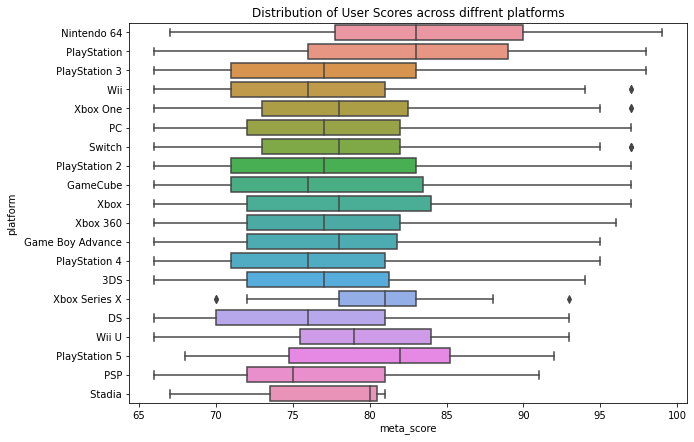

In [49]:
plt.figure(figsize=(10,7))
sns.boxplot(x='meta_score',y='platform',data=Df5)
T = plt.title("Distribution of User Scores across diffrent platforms")

In [50]:
gpc = Df5['platform'].value_counts().reset_index()
gpc.columns = ['platform', 'count']
gpc

,platform,count
0,PC,2572
1,PlayStation 4,679
2,Switch,577
3,Xbox 360,572
4,PlayStation 2,556
5,PlayStation 3,459
6,Xbox One,459
7,DS,326
8,Xbox,270
9,Wii,264


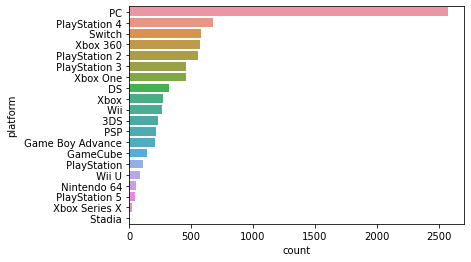

In [51]:
sns.barplot(x = 'count',y = 'platform', data = gpc);

In [110]:
Df5.reset_index(drop=True, inplace=True)

Df5.index

RangeIndex(start=0, stop=7873, step=1)

In [62]:
#First I did TF-IDF Vectorizer
tfidf = TfidfVectorizer()

#Created the matrix
tfidf_matrix = tfidf.fit_transform([str(i) for i in Df5['s']])

#Output the shape of matrix
tfidf_matrix.shape

(7873, 35074)

In [63]:
#tfidf.get_feature_names()[1500:1550]

In [64]:
cosine = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine

array([[1.        , 0.        , 0.02278452, ..., 0.        , 0.02742765,
        0.00709212],
       [0.        , 1.        , 0.00800146, ..., 0.        , 0.05313006,
        0.        ],
       [0.02278452, 0.00800146, 1.        , ..., 0.        , 0.01036188,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.02742765, 0.05313006, 0.01036188, ..., 0.        , 1.        ,
        0.        ],
       [0.00709212, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [65]:
# reverse the indices and video game titles

indices = pd.Series(Df5.index, index=Df5['name'])

indices

name
The Legend of Zelda: Ocarina of Time       0
Tony Hawk's Pro Skater 2                   1
Grand Theft Auto IV                        2
Super Mario Galaxy                         3
Super Mario Galaxy 2                       4
                                        ... 
AirForce Delta Strike                   7868
American Conquest: Fight Back           7869
Tomb Raider: The Prophecy               7870
Home Run King                           7871
Disney's The Emperor's New Groove       7872
Length: 7873, dtype: int64

In [66]:
def recommender_system(title, cosine=cosine):
    
    # get index of video game that matches title
    
    index = indices[title]
    
    # get pairwise similarity scores of all video games with the given title
    
    sim_scores = list(enumerate(cosine[index]))
    
    # sort games based on similarity scores
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # get scores of 10 most similar video games
    
    sim_scores = sim_scores[1:11]
    
    # get game indices
    
    game_indices = [i[0] for i in sim_scores]
    
    # return top 10 most similar video games
    
    recs = Df5['name'].iloc[game_indices]
    
    return recs

In [107]:
recommender_system('Grand Theft Auto V')

2814                        Grand Theft Auto Online
31                     Grand Theft Auto Double Pack
596          Grand Theft Auto: Liberty City Stories
7206                               Grand Theft Auto
89                 Grand Theft Auto: Chinatown Wars
299        Grand Theft Auto IV: The Lost and Damned
5147           Oceanhorn: Monster of Uncharted Seas
5990                                   Auto Assault
2141         Clubhouse Games: 51 Worldwide Classics
432     Grand Theft Auto IV: The Ballad of Gay Tony
Name: name, dtype: object

In [106]:
recommender_system('Super Mario Galaxy')

2076                              Mario Kart Wii
727                    New Super Mario Bros. Wii
99                          Super Mario 3D World
6975                        Mario Super Sluggers
2006                    Super Mario 3D All-Stars
156     Super Mario World: Super Mario Advance 2
902                                  Punch-Out!!
2665                           Wii Sports Resort
3695                       Wario Land: Shake It!
4335                    Mario & Luigi: Paper Jam
Name: name, dtype: object

In [109]:
recommender_system('Far Cry 6')

2115       Far Cry 3: Blood Dragon
6287            Dreamfall Chapters
1928                          RiME
274                      Far Cry 3
2645                   Dead Island
2407             Yoshi's Island DS
4985                          XIII
3613    Far Cry Instincts Predator
4479     Paper Mario: Color Splash
585                      Deathloop
Name: name, dtype: object

In [105]:
recommender_system("Cyberpunk 2077")

4616                        Satellite Reign
966     Grand Theft Auto: Vice City Stories
5991                                    Dex
5531                             Hard Reset
3113                              Prototype
6845                        SimCity Creator
4395                              City Life
5649    Need for Speed Carbon: Own the City
34              Grand Theft Auto: Vice City
4719               City Life: World Edition
Name: name, dtype: object